# OSEMN Exercises

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [16]:
#creat a random list
random_list = np.random.rand(10)
print('Random List:', '\n', random_list)

#save the list in to a text file
with open('simple_data.txt', 'w') as output:
    output.write(str(random_list))

Random List: 
 [0.92909342 0.29108571 0.80277265 0.57250987 0.26628221 0.77893272
 0.97441158 0.0868554  0.59058189 0.99320381]


2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [18]:
#creat a random matrix
random_matrix = np.random.rand(5, 5)
print('Random Matrix:', '\n', random_matrix)

#save the matrix in to a text file
with open('data.txt', 'w') as output:
    output.write(str(random_matrix))

Random Matrix: 
 [[0.42942855 0.51700577 0.72634994 0.39555221 0.40524451]
 [0.90828026 0.40870817 0.99046967 0.63512257 0.35548413]
 [0.03196227 0.52530065 0.72258623 0.4341941  0.43096125]
 [0.33112053 0.0657763  0.13705332 0.18564835 0.65941087]
 [0.28035948 0.45441576 0.71735302 0.83490759 0.94158901]]


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [44]:
import csv

list_file = 'simple_data.txt'
matrix_file = 'data.txt'

#convert the list to a csv file:
with open(list_file, mode='r') as infile:
    with open('simple_data.csv', mode='w') as outfile:
         stripped = (line.strip() for line in infile)
         lines = (line.split(',') for line in stripped if line)  
         writer = csv.writer(outfile)
         writer.writerows(lines)
         print ('The list.csv file:', '\n', line, '\n')

#convert the matrix to a csv file:
with open(matrix_file, mode='r') as infile:
    with open('simple_data.csv', mode='w') as outfile:
         stripped = (line.strip() for line in infile)
         lines = (line.split(',') for line in stripped if line) 
         writer = csv.writer(outfile)
         writer.writerows(lines)
         print ('The matrix.csv file:', '\n', line)

The list.csv file: 
 0.5152772198576022, 0.6003641865270175, 0.5757301098939002, 0.9202330255890847, 0.9576516369387512, 0.7416903057194857, 0.6675023589561759, 0.9407920816975748, 0.4220218502291263, 0.41520864409623603, 0.15791049354449915, 0.7053041088196388, 0.5618866222716214, 0.9232998573613636, 0.6291025466661482, 0.15079643447354807, 0.651692903134583, 0.5934553315355948, 0.7726550148868288, 0.19380928205253245, 0.4556408219146678, 0.9366381512862872, 0.0814152243830587, 0.30847150549917157, 0.032429901381644366,  

The matrix.csv file: 
 0.5152772198576022, 0.6003641865270175, 0.5757301098939002, 0.9202330255890847, 0.9576516369387512, 0.7416903057194857, 0.6675023589561759, 0.9407920816975748, 0.4220218502291263, 0.41520864409623603, 0.15791049354449915, 0.7053041088196388, 0.5618866222716214, 0.9232998573613636, 0.6291025466661482, 0.15079643447354807, 0.651692903134583, 0.5934553315355948, 0.7726550148868288, 0.19380928205253245, 0.4556408219146678, 0.9366381512862872, 0.08

with open("credit_card.dat","rb") as file:
    with open("credit_card.txt","w") as out:
        for line in file:
            for i in range(0,len(line),6):
                if line[i:i+2]== b'10':
                    out.write(" ")
                else: 
                    outp.write(str(int(line[i+2:i+6],2)))
            out.write("\n")4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number.
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [1]:
length = 6

# b is important -> binary
with open('credit_card.dat', mode='rb') as file:
    fileContent = file.readlines()
    
    for line in fileContent:
        x = ''
        for i in range(0, len(line), length):
            if len(line[i:]) >= length:
                y = chr(int(line[i:i+length], 2))
                x += y
        print('Credit card numbers:', x)

Credit card numbers: 7648 5673 3775 2271
Credit card numbers: 3257 8247 3354 2266
Credit card numbers: 2722 0001 4011 6652
Credit card numbers: 0661 3063 3742 3150
Credit card numbers: 0432 1608 1462 4742
Credit card numbers: 5827 2027 8785 7303
Credit card numbers: 5774 8528 2087 1117
Credit card numbers: 8140 1210 6352 2845
Credit card numbers: 5764 1133 7301 7100
Credit card numbers: 6456 1737 4126 6726
Credit card numbers: 1228 8631 7382 0000
Credit card numbers: 7051 0160 5374 3166
Credit card numbers: 0618 3587 1630 6376
Credit card numbers: 1545 5454 7444 5636
Credit card numbers: 6735 3116 3202 6834
Credit card numbers: 7287 5011 1547 8413
Credit card numbers: 7033 2607 3328 4200
Credit card numbers: 2568 5244 1874 5024
Credit card numbers: 1684 2253 7570 7118
Credit card numbers: 0672 2576 0575 6631
Credit card numbers: 6332 8353 8787 1340
Credit card numbers: 1813 3361 1175 4211
Credit card numbers: 2477 6450 8840 2368
Credit card numbers: 5512 3505 2563 1326
Credit card numb

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [14]:
import json
import csv

#Load the file
user_data = json.load(open('user_data.json'))

#filter the data
for x in user_data:
    if (x['CreditCardType']=='American Express'):
         filtered_data.append(x)
print('filteredata:' ,'\n' , filtered_data)

#save data into a csv
with open('filtered_data.csv', mode='w') as f:
    field = list(key for key in filtered_data[0])
    csv_writer = csv.DictWriter(f, fieldnames = field)
    csv_writer.writeheader()
    for i in filtered_data:
        csv_writer.writerow(i)

filteredata: 
 [{'ID': '2', 'JobTitle': 'Investment  Advisor', 'EmailAddress': 'Clint_Thorpe5003@bulaffy.com', 'FirstNameLastName': 'Clint Thorpe', 'CreditCard': '7083-8766-0251-2345', 'CreditCardType': 'American Express'}, {'ID': '12', 'JobTitle': 'Retail Trainee', 'EmailAddress': 'Phillip_Carpenter9505@famism.biz', 'FirstNameLastName': 'Phillip Carpenter', 'CreditCard': '3657-0088-0820-5247', 'CreditCardType': 'American Express'}, {'ID': '28', 'JobTitle': 'Project Manager', 'EmailAddress': 'Russel_Graves1378@extex.org', 'FirstNameLastName': 'Russel Graves', 'CreditCard': '6718-4818-8011-6024', 'CreditCardType': 'American Express'}, {'ID': '39', 'JobTitle': 'Stockbroker', 'EmailAddress': 'Leanne_Newton1268@typill.biz', 'FirstNameLastName': 'Leanne Newton', 'CreditCard': '5438-0816-4166-4847', 'CreditCardType': 'American Express'}, {'ID': '57', 'JobTitle': 'Budget Analyst', 'EmailAddress': 'Tony_Giles1960@iatim.tech', 'FirstNameLastName': 'Tony Giles', 'CreditCard': '8130-3425-7573-774

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the istogram of the 'class' field. Decribe wath you see


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

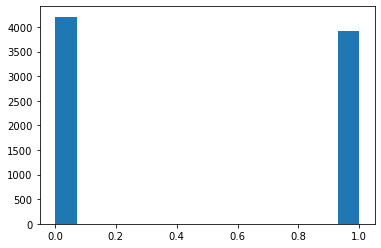

The histogram shows the frequency of the mushrooms:
for the class '0' ------> above 4000 
 for the class '1' ------> more than 3500 and less than 4000


In [45]:
from matplotlib import pyplot as plt

#load file
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
mushroom_categorized = pd.read_csv(url)
display(mushroom_categorized)

#exlore the mushroom_categorized data information
print(mushroom_categorized.info())
print(mushroom_categorized.head())

#draw histogram of the 'class' field
plt.hist(mushroom_categorized['class'] ,bins='auto')
plt.show()
print('The histogram shows the frequency of the mushrooms:'')
print ('for the class '0' ------> above 4000 \n', 'for the class '1' ------> more than 3500 and less than 4000')


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


<AxesSubplot:xlabel='features_1', ylabel='features_3'>

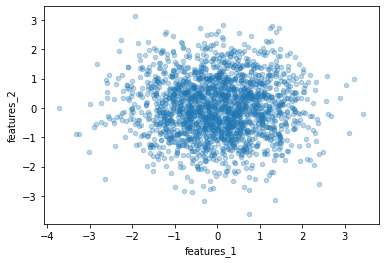

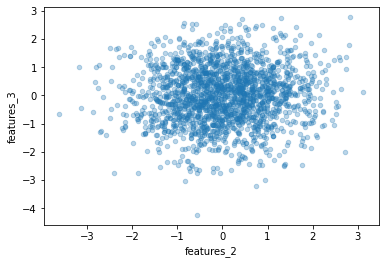

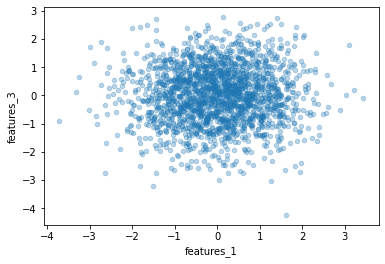

In [60]:
#load file
url = 'https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1'
remote_file = pd.read_csv(url)
display (remote_file)

#scatter plots:

 #features_1 and features_2 
remote_file.plot.scatter('features_1', 'features_2', alpha = 0.3)

 #features_2 and features_3
remote_file.plot.scatter('features_2', 'features_3', alpha = 0.3)

 #features_1 and features_3 
remote_file.plot.scatter('features_1', 'features_3', alpha = 0.3)

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [64]:
import json

#load the file
url = 'https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1'
mushroom_categorized = pd.read_csv(url)
display (mushroom_categorized)

#convert the file to json with Pandas
mushroom_categorized.to_json('mushrooms_categorized.json', orient = 'records')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
